# 2 Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2025-09-30 03:20:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.03s   

2025-09-30 03:20:57 (52.7 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# lower case the columns and replace whitespace with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# list all the dataframes datatypes. Since we're doing string manipulation 'object' columns are what we're looking for since in csvs they wouldn't be anything else.
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [5]:
# we really only want the left side not the values, and we can do that with .index
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [6]:
# wrapped in list() just makes it nicer to look at and read.
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [7]:
# now we need to iterate through the list of columns names and lower and camel case all the values with a for loop.
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


In [9]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

In [21]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [9]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

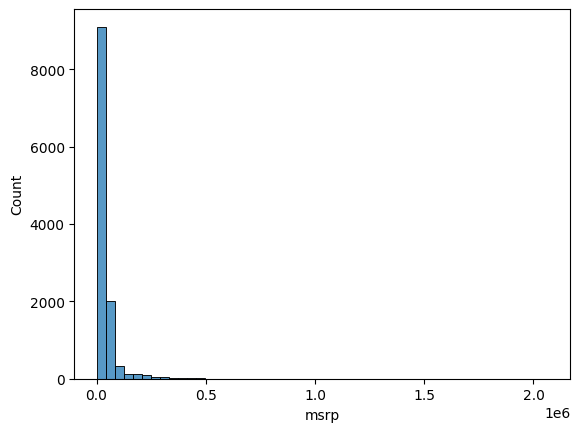

In [27]:
# a small amount of car prices way far off to the right creates a long tail distribution
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

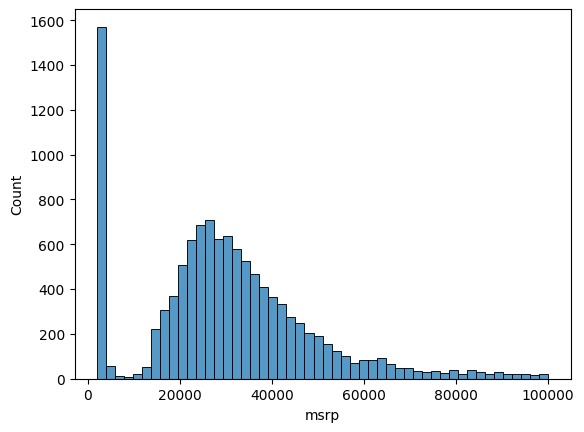

In [28]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [29]:
# long tail distribution is not good for machine learning; the tail will confuse the model.
# so we'll apply the logarithm distribution
# there is no log(0) so log1p is used
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [30]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

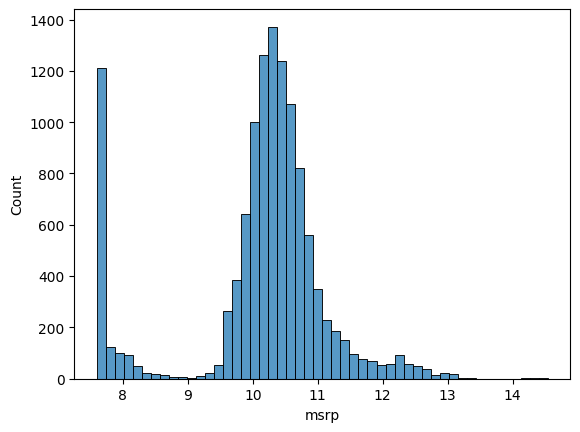

In [31]:
# close to normal distribution
sns.histplot(price_logs, bins=50)

In [10]:
# where do we have null values and how many are there?
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

In [13]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [15]:
idx = np.arange(n)

In [16]:
np.random.seed(2)
np.random.shuffle(idx)

In [17]:
df_val = df.iloc[idx[:n_val]]

In [18]:
df_test = df.iloc[idx[n_val:n_val+n_test]]

In [19]:
df_train = df.iloc[idx[n_val+n_test:]]

In [21]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8597,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,16395
6408,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,24145
11241,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,18000
569,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,15990
1659,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,43585


In [22]:
len(df_val), len(df_test), len(df_train), 

(2382, 2382, 7150)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,16395
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,24145
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,18000
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,15990
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,43585


In [25]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [26]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [27]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

# 2.5 Linear Regression

In [28]:
df_train.iloc[10]

make                        chevrolet
model                 trailblazer_ext
year                             2004
engine_fuel_type     regular_unleaded
engine_hp                       275.0
engine_cylinders                  6.0
transmission_type           automatic
driven_wheels        rear_wheel_drive
number_of_doors                   4.0
market_category                   NaN
vehicle_size                    large
vehicle_style                 4dr_suv
highway_mpg                        18
city_mpg                           13
popularity                       1385
Name: 10, dtype: object

In [29]:
xi = [275, 13, 1385]

In [30]:
w0 = 7.17
w = [.01, .04, .002]

In [31]:
def linear_regression(xi):
    n = len(xi)

    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [32]:
linear_regression(xi)

13.209999999999999

In [33]:
np.expm1(13.209) 

np.float64(545249.1722641989)

In [34]:
np.log1p(545249.1722641989)

np.float64(13.209)

In [35]:
def dot(xi, w):
    n = len(xi)
     
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
         
    return res

In [36]:
def linear_regression(xi):
    return w0 + dot(xi, w) 

In [37]:
w_new = [w0] + w

In [38]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [39]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new) 

In [40]:
linear_regression(xi)

13.209999999999999

In [43]:
w0 = 7.17
w = [.01, .04, .002]
w_new = [w0] + w

In [44]:
x1 = [1, 148, 24, 85]
x2 = [1, 132, 25, 2031]
x10 = [1, 275, 13, 1385]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24,   85],
       [   1,  132,   25, 2031],
       [   1,  275,   13, 1385]])

In [45]:
def linear_regression(X):
    return X.dot(w_new)

In [46]:
linear_regression(X)

array([ 9.78 , 13.552, 13.21 ])

# 2.7 Training a Linear Regression Model 

In [47]:
def train_linear_regression(X, y):
    pass

In [61]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [62]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [63]:
X = np.column_stack([ones, X])

In [64]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [65]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [66]:
XTX_inv = np.linalg.inv(XTX)

In [67]:
# check to see if there is an id matrix
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [68]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [69]:
w0 = w_full[0]
w = w_full[1:]

In [70]:
w0, w

(np.float64(300.0677669255554), array([-0.22774253, -2.5769413 , -0.02301206]))

In [83]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [84]:
train_linear_regression(X, y)

ValueError: shapes (6,7150) and (9,) not aligned: 7150 (dim 1) != 9 (dim 0)

# 2.8 Car price baseline model

In [75]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385
7146,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640
7147,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851
7148,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202


In [76]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [77]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [78]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,162.0,4.0,26,19,1720
1,175.0,4.0,36,26,640
2,132.0,4.0,35,27,1439
3,101.0,4.0,33,27,819
4,302.0,8.0,16,11,61
...,...,...,...,...,...
7145,200.0,6.0,18,13,1385
7146,160.0,4.0,33,29,640
7147,250.0,6.0,22,15,1851
7148,174.0,4.0,42,31,2202


In [88]:
X_train = df_train[base].values
X_train

array([[ 162.,    4.,   26.,   19., 1720.],
       [ 175.,    4.,   36.,   26.,  640.],
       [ 132.,    4.,   35.,   27., 1439.],
       ...,
       [ 250.,    6.,   22.,   15., 1851.],
       [ 174.,    4.,   42.,   31., 2202.],
       [ 256.,    6.,   27.,   20.,  640.]], shape=(7150, 5))

In [87]:
y_train

array([ 9.70479268, 10.09187401,  9.79818259, ..., 10.27852782,
       10.00789261, 10.40414162], shape=(7150,))

In [95]:
# there are missing values at this stage
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [93]:
# search for missing values
df_train[base].isnull().sum()

engine_hp           43
engine_cylinders    20
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [94]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [96]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 162.,    4.,   26.,   19., 1720.],
       [ 175.,    4.,   36.,   26.,  640.],
       [ 132.,    4.,   35.,   27., 1439.],
       ...,
       [ 250.,    6.,   22.,   15., 1851.],
       [ 174.,    4.,   42.,   31., 2202.],
       [ 256.,    6.,   27.,   20.,  640.]], shape=(7150, 5))

In [99]:
w0, w = train_linear_regression(X_train, y_train)

In [101]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

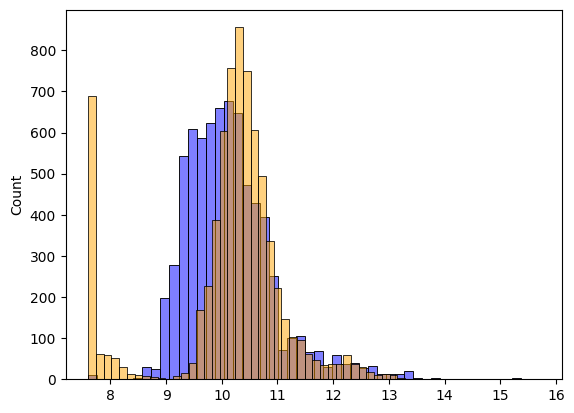

In [105]:
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='orange', alpha=0.5, bins=50)

# 2.9 RMSE

In [107]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [108]:
rmse(y_train, y_pred)

np.float64(0.745130516822012)

#  2.10 Validating the Model

In [110]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [111]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7419381478118969)

# 2.11 Simple Feature Engineering

In [119]:
2017 - df_train.year

0        9
1        1
2        1
3        0
4       12
        ..
7145    19
7146     3
7147    11
7148     1
7149     2
Name: year, Length: 7150, dtype: int64

In [131]:
def prepare_X(df):
    df = df.copy() # don't alter the original df.
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [132]:
X_train = prepare_X(df_train)

In [130]:
# should include the new "age" column
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
age                    int64
dtype: object

In [133]:
# delete the age column from the original dataframe
del df_train['age']

In [134]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [138]:
# The model has improved!
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5222394405268986)

<Axes: ylabel='Count'>

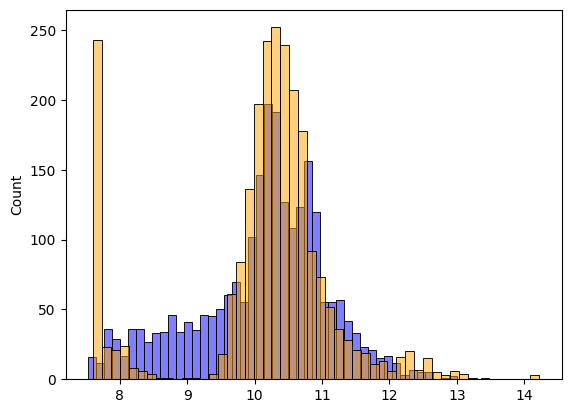

In [140]:
# But it's still not great...
sns.histplot(y_pred, color='blue', alpha=0.5, bins=50)
sns.histplot(y_val, color='orange', alpha=0.5, bins=50)

# 2.12 Categorical Variables